In [21]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [2]:
PATH = "../Data/exp_2/combinedResult.csv"

def load_data(csv_path=PATH):
    return pd.read_csv(csv_path)

In [3]:
data = load_data()
data.head()

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,SubFrame,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz
0,23,0.0,0.0,0.0,0.0,0.0,-44.92,-885.74,531.25,1.32,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,54,0.0,0.0,0.0,0.0,0.0,-27.83,-877.93,524.90,-1.89,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,84,0.0,0.0,0.0,0.0,0.0,-31.74,-877.44,532.71,1.95,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,115,0.0,0.0,0.0,0.0,0.0,-46.39,-884.77,522.95,1.03,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,146,0.0,0.0,0.0,0.0,0.0,-30.76,-888.18,534.18,-1.17,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
##### removing zero values so that data is not scattered highly

data = data[data['s'] != 0]

# Display the first few rows of the filtered dataset
data.head()



,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,SubFrame,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz
320,9913,14.80,14.78,14.59,14.64,14.70,-77.15,-858.40,526.86,17.38,...,0,4.33732,1.20498,-58.7935,8406.26,-7275.70,1761.170,-123.7660,-143.005,0
321,9943,14.89,14.79,14.59,14.64,14.73,46.88,-758.79,516.11,8.74,...,0,4.54202,6.58381,-74.4735,10126.00,-8715.51,860.735,-117.0310,-135.970,0
322,9974,15.03,14.79,14.60,14.66,14.77,-53.22,-823.24,583.98,29.35,...,0,5.29861,6.50661,-85.3810,11726.90,-9556.19,1232.870,-111.9220,-137.348,0
323,10004,15.13,14.80,14.60,14.67,14.80,-50.29,-893.55,503.42,13.38,...,0,8.90183,13.96900,-117.3670,15175.70,-12152.10,926.790,-103.5520,-129.282,0
324,10036,15.23,14.80,14.60,14.69,14.83,-77.15,-874.51,567.38,20.85,...,0,11.66670,14.68690,-166.2110,21214.70,-16256.30,855.233,-97.8092,-127.639,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 320 to 2410
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   currTime  846 non-null    int64  
 1   s1        846 non-null    float64
 2   s2        846 non-null    float64
 3   s3        846 non-null    float64
 4   s4        846 non-null    float64
 5   s         846 non-null    float64
 6   AccX      846 non-null    float64
 7   AccY      846 non-null    float64
 8   AccZ      846 non-null    float64
 9   GyroX     846 non-null    float64
 10  GyroY     846 non-null    float64
 11  GyroZ     846 non-null    float64
 12  Frame     846 non-null    int64  
 13  SubFrame  846 non-null    int64  
 14  Fx        846 non-null    float64
 15  Fy        846 non-null    float64
 16  Fz        846 non-null    float64
 17  Mx        846 non-null    float64
 18  My        846 non-null    float64
 19  Mz        846 non-null    float64
 20  Cx        846 non-null    float64


In [6]:
data.describe()

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,SubFrame,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,...,846.0,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000,846.0
mean,40680.196217,15.737139,14.823546,14.657045,14.841738,15.014775,-32.681525,-859.867281,582.484102,0.529764,...,0.0,20.783049,32.893930,-436.79904,38438.376123,-28980.041348,257.520587,-70.634217,-97.440983,0.0
std,20049.937243,0.453083,0.049079,0.047376,0.154040,0.132348,64.519819,91.445424,68.658086,22.629449,...,0.0,11.203442,19.998097,161.56879,16722.379129,16639.010615,2054.197200,32.067522,36.402449,0.0
min,9913.000000,14.620000,14.760000,14.590000,14.630000,14.650000,-343.260000,-1683.590000,150.390000,-114.210000,...,0.0,-9.841450,-7.724890,-574.54800,4280.880000,-67179.800000,-6131.210000,-195.942000,-218.325000,0.0
25%,21498.500000,15.430000,14.790000,14.620000,14.720000,14.980000,-46.390000,-871.090000,550.290000,-5.785000,...,0.0,12.285925,15.448875,-540.23125,25728.525000,-38839.575000,-941.307250,-92.875125,-118.341500,0.0
50%,39815.500000,15.835000,14.810000,14.650000,14.825000,15.060000,-32.710000,-837.400000,595.210000,0.670000,...,0.0,20.649300,33.356600,-521.16900,40378.500000,-26144.250000,566.938500,-69.816650,-98.367750,0.0
75%,58495.250000,16.070000,14.830000,14.690000,14.947500,15.107500,-19.530000,-816.890000,619.140000,6.105000,...,0.0,28.911750,48.675950,-394.76600,51953.625000,-16301.300000,1593.117500,-46.738500,-74.040175,0.0
max,74425.000000,16.510000,15.020000,14.790000,15.270000,15.180000,562.010000,-638.670000,1045.410000,95.940000,...,0.0,54.220000,79.075500,-22.27370,72266.500000,-2234.110000,6509.300000,-4.195730,-14.575700,0.0


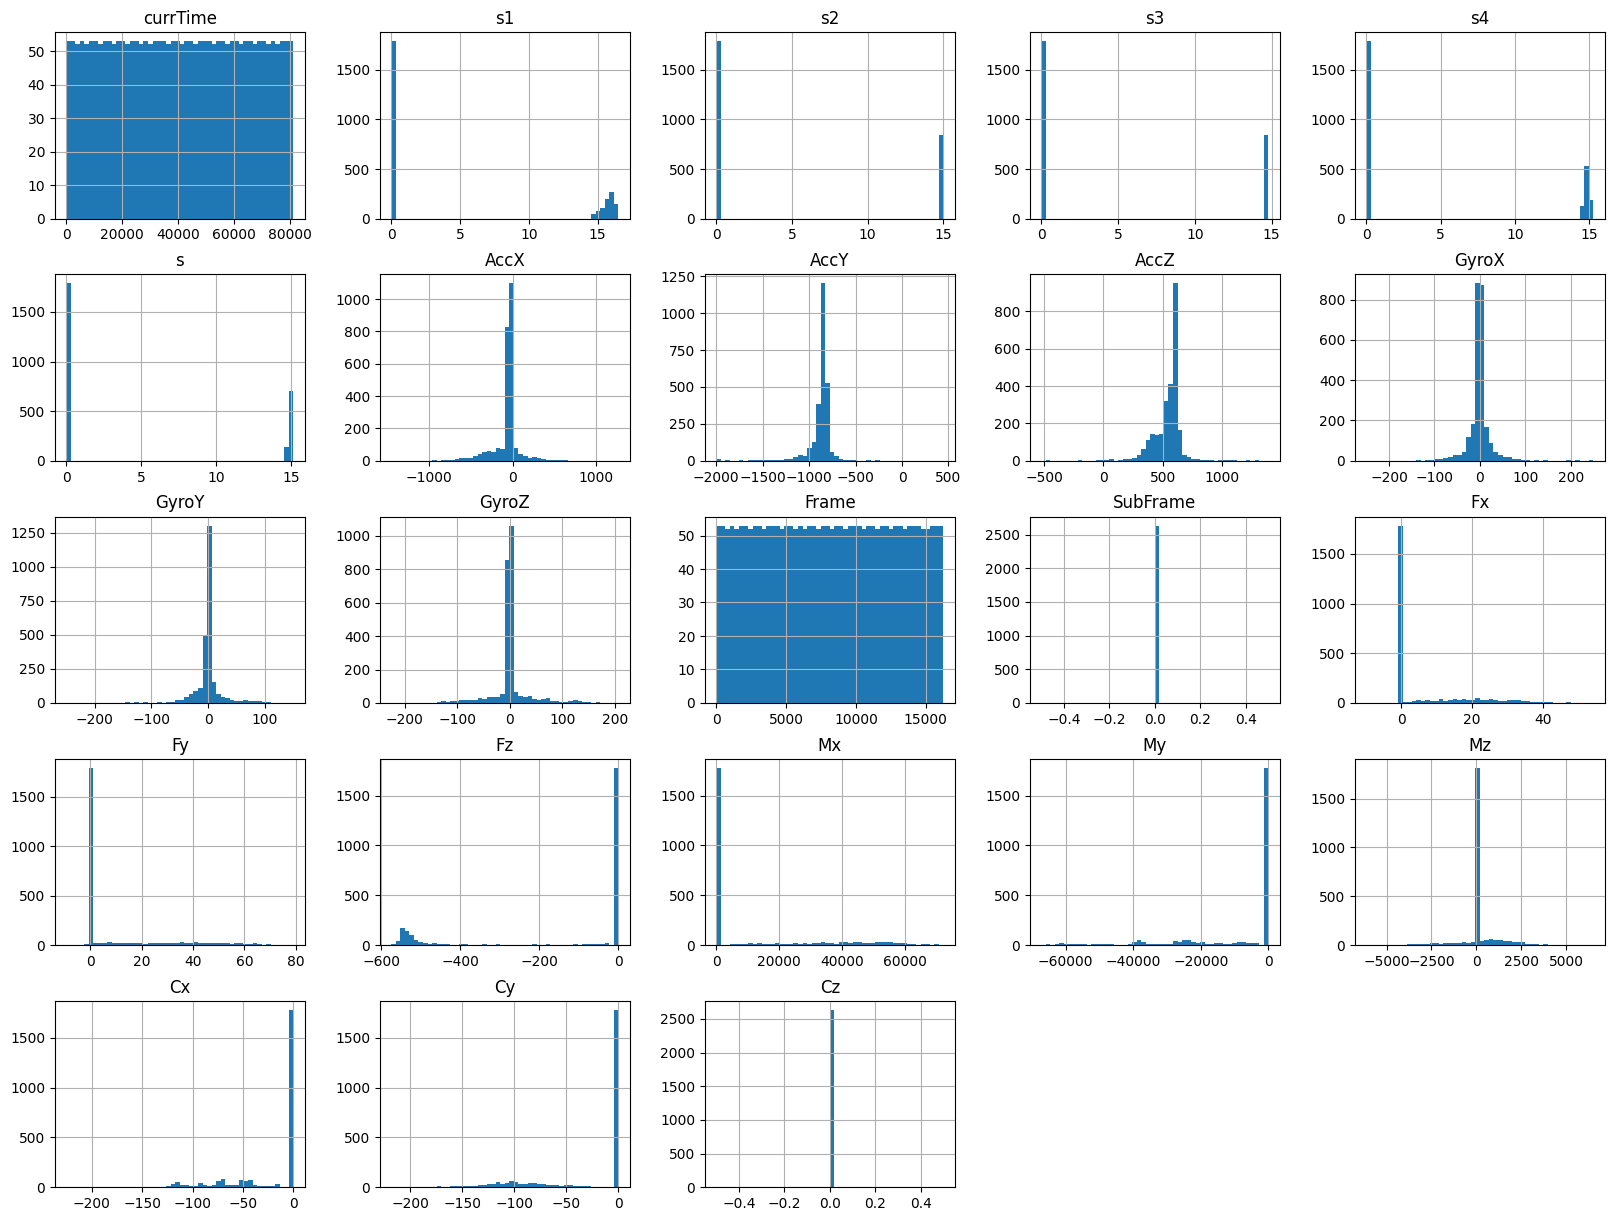

In [8]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
data_labels = data["Fz"]
data.drop("Fz", axis=1)

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,Frame,SubFrame,Fx,Fy,Mx,My,Mz,Cx,Cy,Cz
320,9913,14.80,14.78,14.59,14.64,14.70,-77.15,-858.40,526.86,17.38,...,1983,0,4.33732,1.20498,8406.26,-7275.70,1761.170,-123.7660,-143.0050,0
321,9943,14.89,14.79,14.59,14.64,14.73,46.88,-758.79,516.11,8.74,...,1989,0,4.54202,6.58381,10126.00,-8715.51,860.735,-117.0310,-135.9700,0
322,9974,15.03,14.79,14.60,14.66,14.77,-53.22,-823.24,583.98,29.35,...,1995,0,5.29861,6.50661,11726.90,-9556.19,1232.870,-111.9220,-137.3480,0
323,10004,15.13,14.80,14.60,14.67,14.80,-50.29,-893.55,503.42,13.38,...,2001,0,8.90183,13.96900,15175.70,-12152.10,926.790,-103.5520,-129.2820,0
324,10036,15.23,14.80,14.60,14.69,14.83,-77.15,-874.51,567.38,20.85,...,2007,0,11.66670,14.68690,21214.70,-16256.30,855.233,-97.8092,-127.6390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406,74302,15.40,14.80,14.60,14.64,14.86,199.22,-974.61,736.82,-71.38,...,14860,0,27.69260,63.06990,25697.60,-21645.00,-1375.870,-79.4372,-94.3158,0
2407,74333,15.18,14.78,14.60,14.64,14.80,172.85,-1156.25,675.29,-114.21,...,14867,0,19.19830,44.40100,21902.80,-16852.80,-542.884,-83.2774,-108.2390,0
2408,74363,14.97,14.77,14.60,14.64,14.74,-59.08,-1038.57,642.09,6.69,...,14873,0,12.37050,27.30020,18368.20,-13103.50,272.281,-89.2139,-125.0610,0
2409,74394,14.80,14.77,14.59,14.63,14.70,-59.57,-1489.75,516.60,7.13,...,14879,0,9.40966,14.36710,14117.60,-9622.62,946.425,-97.8270,-143.5160,0


Dimensionality Reduction for better performance

In [ ]:
data = data.drop(["s", "currTime", "Frame"], axis=1)
data.head()

In [30]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2,
random_state=42)

train_labels, test_labels = train_test_split(data_labels,test_size=0.2,
random_state=42 )
## random_state ensures that same indices of split is produced every time

Standard correlation coefficiant tells the correlation between the desired vairbles with other vairables in the data set and gives insight of how a specific variable is related to the desired variable

In [31]:
corr_matrix = data.corr()
corr_matrix["Fz"].sort_values(ascending=False)

Fz          1.000000
My          0.574939
GyroZ       0.334128
GyroY       0.296376
Mz          0.215862
GyroX       0.122798
AccX       -0.046284
AccZ       -0.187392
Fy         -0.275551
Fx         -0.291359
Cx         -0.361863
AccY       -0.430872
s2         -0.465058
s3         -0.645560
Mx         -0.649585
s4         -0.674924
Cy         -0.701912
s1         -0.732615
SubFrame         NaN
Cz               NaN
Name: Fz, dtype: float64

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define a pipeline with only the StandardScaler step
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

# Apply the pipeline to the numerical data

In [33]:
train_data_scaled = num_pipeline.fit_transform(train_set)
test_data_scaled = num_pipeline.fit_transform(test_set)

In [66]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data_scaled, train_labels)

LinearRegression()

In [68]:
some_data = train_set.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = num_pipeline.fit_transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 133.75431252 -322.03079333 -339.38214737  133.75431252 -294.95550877]


In [69]:
print("Labels:", list(some_labels))

Labels: [0.0, -528.722, -548.85, 0.0, -497.314]


In [74]:
from sklearn.metrics import mean_squared_error
import numpy as np

housing_predictions = lin_reg.predict(train_data_scaled)
lin_mse = mean_squared_error(train_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.755076990032202e-13

In [70]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set, train_labels)

DecisionTreeRegressor()

In [73]:
import numpy as  np
from sklearn.metrics import mean_squared_error

housing_predictions = tree_reg.predict(data_train_scaled)
tree_mse = mean_squared_error(train_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

c:\Users\Dhruv Thakkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


261.40514845597323

In [75]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_data_scaled, train_labels)

RandomForestRegressor()

In [19]:
some_data = train_set.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = num_pipeline.fit_transform(some_data)
# print("Predictions:", forest_reg.predict(some_data_prepared))

In [78]:
print("Labels:", list(some_labels))

Labels: [0.0, -528.722, -548.85, 0.0, -497.314]


In [77]:
predictions = forest_reg.predict(data_train_scaled)
forest_mse = mean_squared_error(train_labels, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.3337800891691536

In [85]:
from sklearn.svm import SVR


print("\n--- Support Vector Regressor (SVR) ---")
svr_model = SVR(kernel='rbf')
svr_model.fit(train_data_scaled, train_labels)  # Use scaled data for SVR


--- Support Vector Regressor (SVR) ---


SVR()

In [34]:
some_data = train_set.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = num_pipeline.fit_transform(some_data)
# print("Predictions:", svr_model.predict(some_data_prepared))

In [87]:
print("Labels:", list(some_labels))

Labels: [0.0, -528.722, -548.85, 0.0, -497.314]


In [88]:
predictions = svr_model.predict(data_train_scaled)
svr_mse = mean_squared_error(train_labels, predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

100.51234750430896

In [92]:
print("Linear Reg:", lin_reg.predict(some_data_prepared))
print("Decision tree:", tree_reg.predict(some_data_prepared))
print("random forest:", forest_reg.predict(some_data_prepared))
print("svr:", svr_model.predict(some_data_prepared),"\n\n")

print("Actual:", list(some_labels))

Linear Reg: [ 133.75431252 -322.03079333 -339.38214737  133.75431252 -294.95550877]
Decision tree: [0. 0. 0. 0. 0.]
random forest: [  -3.2195949 -322.40639   -339.63622     -3.1526309 -296.0387   ]
svr: [ -52.73409624 -281.15618428 -217.33672169  -21.77034131 -267.70989096] 


Actual: [0.0, -528.722, -548.85, 0.0, -497.314]


c:\Users\Dhruv Thakkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [35]:
## duplicating the dataset
import numpy as np
train_set_triple = np.concatenate([train_set, train_set, train_set], axis=0)
triple_data_labels = np.concatenate([train_labels, train_labels, train_labels], axis =0)

In [36]:
triple_data_scaled = num_pipeline.fit_transform(train_set_triple)


In [37]:
triple_lin_reg = LinearRegression()
triple_lin_reg.fit(triple_data_scaled, triple_data_labels)

triple_tree_reg = DecisionTreeRegressor()
triple_tree_reg.fit(triple_data_scaled, triple_data_labels)

triple_forest_reg = RandomForestRegressor()
triple_forest_reg.fit(triple_data_scaled, triple_data_labels)


triple_svr_model = SVR(kernel='rbf')
triple_svr_model.fit(triple_data_scaled, triple_data_labels)

SVR()

In [39]:

# Predictions from each model
lin_reg_predictions = triple_lin_reg.predict(some_data_prepared)
tree_reg_predictions = triple_tree_reg.predict(some_data_prepared)
forest_reg_predictions = triple_forest_reg.predict(some_data_prepared)
svr_predictions = triple_svr_model.predict(some_data_prepared)

# Calculating MSE for each model
lin_reg_mse = mean_squared_error(some_labels, lin_reg_predictions)
tree_reg_mse = mean_squared_error(some_labels, tree_reg_predictions)
forest_reg_mse = mean_squared_error(some_labels, forest_reg_predictions)
svr_mse = mean_squared_error(some_labels, svr_predictions)

# Printing the predictions and MSE values for each model
print("Linear Regression Predictions:", lin_reg_predictions)
print("Decision Tree Predictions:", tree_reg_predictions)
print("Random Forest Predictions:", forest_reg_predictions)
print("SVR Predictions:", svr_predictions, "\n")

print("Linear Regression MSE:", lin_reg_mse)
print("Decision Tree MSE:", tree_reg_mse)
print("Random Forest MSE:", forest_reg_mse)
print("SVR MSE:", svr_mse, "\n")

# Print the actual values for comparison
print("Actual:", list(some_labels))

Linear Regression Predictions: [-439.69299065 -396.80197067 -560.78044571 -632.20008586 -160.12008477]
Decision Tree Predictions: [-439.179 -409.939 -558.859 -574.548 -163.632]
Random Forest Predictions: [-438.27482 -398.95782 -559.44757 -573.46496 -163.71588]
SVR Predictions: [-463.97650922 -482.03278708 -477.08517392 -515.44415355 -411.60284531] 

Linear Regression MSE: 16038.954944701685
Decision Tree MSE: 13981.837830600003
Random Forest MSE: 14314.787883361176
SVR MSE: 836.5203313950067 

Actual: [-491.169, -478.707, -526.351, -547.102, -409.939]


In [43]:
from sklearn.metrics import r2_score

# Calculate R-squared for each model
r2_lin_reg = r2_score(some_labels, lin_reg_predictions)
r2_tree_reg = r2_score(some_labels, tree_reg_predictions)
r2_forest_reg = r2_score(some_labels, forest_reg_predictions)
r2_svr = r2_score(some_labels, svr_predictions)

# Convert R-squared to accuracy percentage
accuracy_lin_reg = r2_lin_reg * 100
accuracy_tree_reg = r2_tree_reg * 100
accuracy_forest_reg = r2_forest_reg * 100
accuracy_svr = r2_svr * 100

# Print the accuracy percentages
print(f"Linear Regression Accuracy (R-squared): {accuracy_lin_reg:.2f}%")
print(f"Decision Tree Accuracy (R-squared): {accuracy_tree_reg:.2f}%")
print(f"Random Forest Accuracy (R-squared): {accuracy_forest_reg:.2f}%")
print(f"SVR Accuracy (R-squared): {accuracy_svr:.2f}%")


Linear Regression Accuracy (R-squared): -621.27%
Decision Tree Accuracy (R-squared): -528.76%
Random Forest Accuracy (R-squared): -543.73%
SVR Accuracy (R-squared): 62.38%
